In [1]:
from pprint import pprint
from kid_readout.measurement import core, legacy
from kid_readout.measurement.io import readoutnc
from kid_readout.analysis.resonator import plot_resonator

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
d = {'one': {'two': {'three': 3}}}
sd = core.to_state_dict(d)
sd

{'one': {'two': {'three': 3}}}

In [3]:
filename = '/data/readout/2015-05-12_203101_mmw_noise_broadband.nc'
rnc = readoutnc.ReadoutNetCDF(filename)
index = 3
ssa = legacy.sweepstreamarray_from_rnc(rnc, index, index)

In [14]:
rnc.timestreams[0].lo

AttributeError: 'TimestreamGroup' object has no attribute 'lo'

In [4]:
ssa.stream_array.baseband_frequency

array([  96.06420898,  101.9543457 ,  108.86425781,  112.25634766,
        117.27148438,  127.77612305,  144.18212891,  148.24023438,
        164.07202148,  164.36254883,  165.40820312,  174.94238281,
        178.93066406,  184.54003906,  188.85351562,  195.703125  ])

In [5]:
ssa.stream_array.frequency

array([  96.06420898,  101.9543457 ,  108.86425781,  112.25634766,
        117.27148438,  127.77612305,  144.18212891,  148.24023438,
        164.07202148,  164.36254883,  165.40820312,  174.94238281,
        178.93066406,  184.54003906,  188.85351562,  195.703125  ])

In [6]:
ssa.stream_array.fft_bin

array([ 6149,  6526,  6968,  7185,  7506,  8179, 15349, 15090, 14076,
       14058, 13991, 13381, 13125, 12766, 12490, 12052], dtype=int32)

In [7]:
pprint(ssa.stream_array.state)

{'gitinfo': u'commit 5a79f1ef014c88c9f74f4096692434af02fd2855\nAuthor: Daniel Flanigan <daniel.isaiah.flanigan@gmail.com>\nDate:   Wed May 6 15:13:28 2015 -0400\n\n    select_bank fix in roach_interface plus various acquisition scripts\n',
 'lockin': {'rms_voltage': 0.00211693, 'zbd_power_db_arb': 0.0},
 'mmw_source': {'mickey_turns': 5.5,
                'minnie_turns': 5.5,
                'output_frequency': None},
 'roach': {'adc_attenuation': 31.5,
           'adc_sample_rate_MHz': 512.0,
           'audio_sample_rate': 15625.0,
           'boffile': u'bb2xpfb14mcr17b_2015_Apr_21_1159.bof',
           'dac_attenuation': 41.0,
           'delay_estimate': -6.33e-05,
           'hardware_state_epoch': 1431478007.102651,
           'hardware_state_index': 7,
           'heterodyne': False,
           'modulation': {'duty_cycle': 0.0,
                          'frequency': 0.0,
                          'num_samples': 0,
                          'output': 0,
                         

In [8]:
ss0 = ssa.sweep_stream(0)

In [9]:
ss0.sweep.s21

array([-0.01622773-0.00225238j, -0.01331450-0.00938579j,
       -0.00752257-0.01429363j, -0.00029110-0.01593101j,
        0.00656723-0.01406818j,  0.01119510-0.00943506j,
        0.01168344-0.00830104j,  0.01198287-0.00712942j,
        0.01207530-0.00595353j,  0.01191385-0.00471467j,
        0.01147575-0.00346729j,  0.01071772-0.00215621j,
        0.00959797-0.00067824j,  0.00815196+0.00109254j,
        0.00656753+0.00340137j,  0.00529124+0.00628758j,
        0.00478384+0.00933477j,  0.00492015+0.01183722j,
        0.00509552+0.01356087j,  0.00497292+0.01471244j,
        0.00450994+0.01552513j,  0.00375421+0.0161291j ,
        0.00277712+0.01657606j,  0.00164929+0.01688061j,
        0.00040062+0.01705899j, -0.00092324+0.01710356j,
       -0.00791919+0.01530494j, -0.01379917+0.01028967j,
       -0.01691373+0.00298937j, -0.01639415-0.00501304j,
       -0.01226114-0.01194453j])

In [10]:
ss0.sweep.frequency

array([ 96.05566406,  96.05688477,  96.05810547,  96.05932617,
        96.06054688,  96.06176758,  96.06201172,  96.06225586,
        96.0625    ,  96.06274414,  96.06298828,  96.06323242,
        96.06347656,  96.0637207 ,  96.06396484,  96.06420898,
        96.06445312,  96.06469727,  96.06494141,  96.06518555,
        96.06542969,  96.06567383,  96.06591797,  96.06616211,
        96.06640625,  96.06665039,  96.06787109,  96.0690918 ,
        96.0703125 ,  96.0715332 ,  96.07275391])

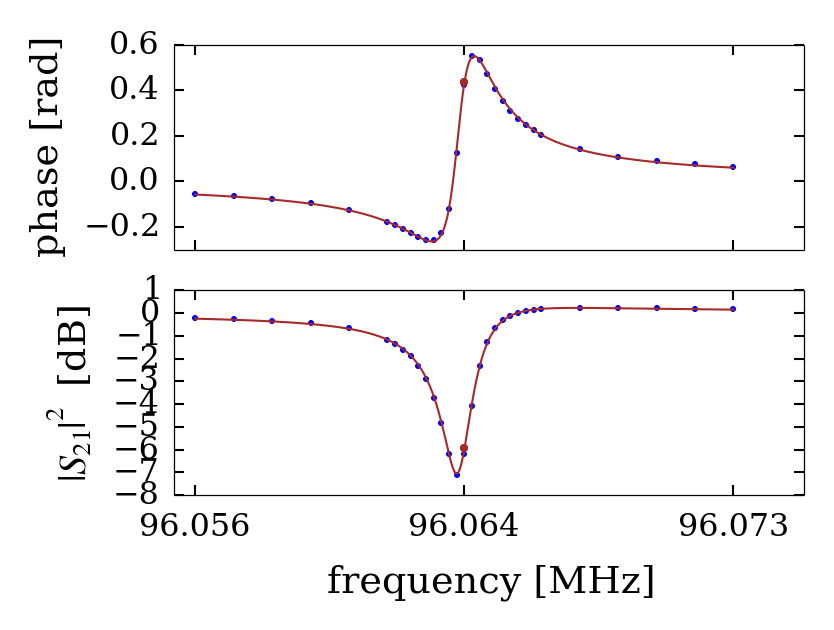

In [13]:
plot_resonator.amplitude_and_phase(ssa.sweep_stream(0).sweep.resonator, normalize_s21=True);